# Mean-Shift Clustering

In [1]:
import pandas as pd
from sklearn.cluster import MeanShift
from sklearn.preprocessing import StandardScaler 
import numpy as np
import matplotlib.pyplot as plt
import pickle

## Open Dataframes from File

In [36]:
# load resource_priority_df from a file
with open('resource_priority_df.pickle', 'rb') as f:
    resource_priority_df = pickle.load(f)
    
# load ability_priority_df from a file
with open('ability_priority_df.pickle', 'rb') as f:
    ability_priority_df = pickle.load(f)
    
# load lane_info_df from a file 
with open('lane_info_df.pickle', 'rb') as f:
    lane_info_df = pickle.load(f)
    

In [3]:
hero_id = 7 #earthshaker
resource_priority_df = resource_priority_df[resource_priority_df['hero_id'] == hero_id]

## Function for visualizing counts

In [4]:
def show_cluster_counts(dataframe, graph_name):
    role_counts = np.bincount(dataframe)

    plt.bar(range(len(role_counts)), role_counts)

    plt.xlabel('Role')
    plt.ylabel('Count')
    plt.title(graph_name)

    plt.show()

## Mean Shift -- Resource Prioritization

In [13]:
hero_id = 7 #earthshaker
resource_priority_df = resource_priority_df[resource_priority_df['hero_id'] == hero_id]

[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 2 2 2 2 0 2 2 2 2 2 2 2 0 2
 0 2 2 0 0 1 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 2
 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 3 1 1 0 0 0 0 2 0 0 1 1
 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 1 0 0 1 2 0 0 0 0 0 0 0 3 1
 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 3 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 3 0 0 1 1
 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 2 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 4 1 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]


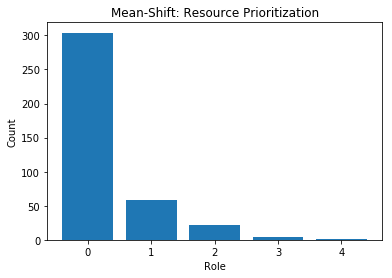

In [ ]:
scale = StandardScaler()
scaled_df_rp = scale.fit_transform(X_rp[['xpm_priority', 'gold_priority']])

meanshift_rp = MeanShift(bandwidth=.75)

meanshift_rp.fit(scaled_df_rp)

target_hero_roles_rp = meanshift_rp.predict(scaled_df_rp)

print(target_hero_roles_rp) 

show_cluster_counts(target_hero_roles_rp, "Mean-Shift: Resource Prioritization")

## Mean Shift -- Ability Prioritization

In [35]:
scale = StandardScaler()
scaled_df_ap = scale.fit_transform(ability_priority_df[['A1', 'A2', 'A3', 'A4']])

meanshift_ap = MeanShift(bandwidth=2)

meanshift_ap.fit(scaled_df_ap)

target_hero_roles_ap = meanshift_ap.predict(scaled_df_ap)

print(target_hero_roles_ap) 

show_cluster_counts(target_hero_roles_ap, "Mean-Shift: Ability Prioritization")

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

## Mean Shift -- Lane Info


[0 0 1 1 0 0 1 0 0 1 0 0 2 0 0 0 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 1 0
 0 0 2 2 0 2 0 0 0 0 0 0 0 0 1 0 0 0 1 2 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0
 1 1 4 0 0 0 2 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 1 0 1 0 1 1
 0 1 1 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 3 0 0 0 1 0 0 0 1 0 2 0 1 4
 0 1 0 2 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 3 1 1 1 1 0 0
 0 0 2 1 0 1 3 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 2 0 0 0 3 0 1 0 1 0 0 0 0 1
 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 1 0 0 0 1 0 0 2 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 2 0 0
 0 0 0 2 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 2 0 1 0 0 0 1 1 0 0 0 0 0 0 2 1 0
 1 1 0 0 1 0 0 0 1 0 1 0 0]


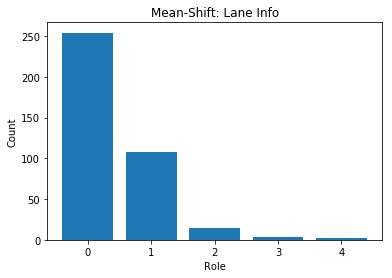

In [42]:
scale = StandardScaler()
scaled_df_lane = scale.fit_transform(lane_info_df[['off', 'mid', 'safe', 'roaming']])

meanshift_lane = MeanShift(bandwidth=1)

meanshift_lane.fit(scaled_df_lane)

target_hero_roles_lane = meanshift_lane.predict(scaled_df_lane)

print(target_hero_roles_lane) 

show_cluster_counts(target_hero_roles_lane, "Mean-Shift: Lane Info")

373
